In [26]:
##https://medium.com/machine-learning-with-python/logistic-regression-implementation-in-python-74321fafa95c

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
df=pd.read_csv(r"C:\Users\NAIB\Downloads\archive (4)\tested.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [29]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Fare'].fillna(df['Fare'].median(),inplace=True)
df=df.drop(columns=['Cabin'],axis=1)



In [30]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [31]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
df=df.drop(columns=['PassengerId','Name','Ticket'])

In [33]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [34]:
df['TravelAlone']=np.where((df["SibSp"]+df["Parch"]), 0, 1)
df.drop('SibSp', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)

In [35]:
df.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,male,34.5,7.8292,Q,1
1,1,3,female,47.0,7.0000,S,0
2,0,2,male,62.0,9.6875,Q,1
3,0,3,male,27.0,8.6625,S,1
4,1,3,female,22.0,12.2875,S,0


In [36]:
df.shape

(418, 7)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    object 
 6   TravelAlone  418 non-null    int32  
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 21.4+ KB


In [39]:
df.describe()

,Survived,Pclass,Age,Fare,TravelAlone
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,30.272590,35.576535,0.605263
std,0.481622,0.841838,12.634534,55.850103,0.489380
min,0.000000,1.000000,0.170000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,7.895800,0.000000
50%,0.000000,3.000000,30.272590,14.454200,1.000000
75%,1.000000,3.000000,35.750000,31.471875,1.000000
max,1.000000,3.000000,76.000000,512.329200,1.000000


C:\Users\NAIB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


male      266
female    152
Name: Sex, dtype: int64

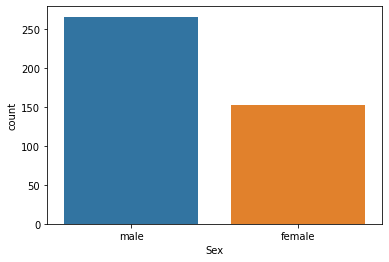

In [45]:
#Count of passengers based on gender

sns.countplot('Sex',data=df)
df['Sex'].value_counts()

,Sex,Survived
0,female,1.0
1,male,0.0


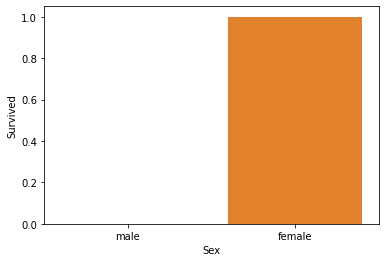

In [48]:
#Percentage of passengers survived grouped by gender

sns.barplot(x='Sex',y='Survived',data=df)
df.groupby('Sex',as_index=False).Survived.mean()


C:\Users\NAIB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3    218
1    107
2     93
Name: Pclass, dtype: int64

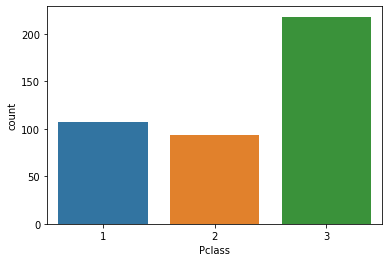

In [50]:
#Count of passengers based on Pclass
sns.countplot('Pclass',data=df)
df['Pclass'].value_counts()

,Pclass,Survived
0,1,0.467290
1,2,0.322581
2,3,0.330275


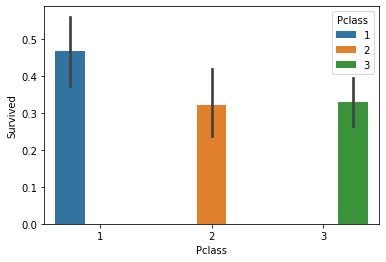

In [52]:
#Precentage of passengers survived grouped by Pclass
sns.barplot(x='Pclass',y='Survived',hue='Pclass',data=df)
df.groupby('Pclass',as_index=False).Survived.mean()

C:\Users\NAIB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


S    270
C    102
Q     46
Name: Embarked, dtype: int64

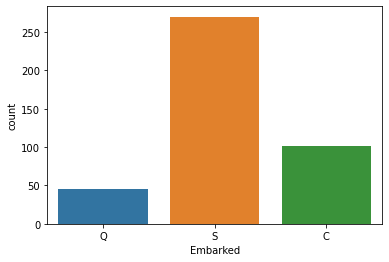

In [54]:
#Count of the passengers basen on Emabarked
sns.countplot('Embarked',data=df)
df['Embarked'].value_counts()


,Embarked,Survived
0,C,0.392157
1,Q,0.521739
2,S,0.325926


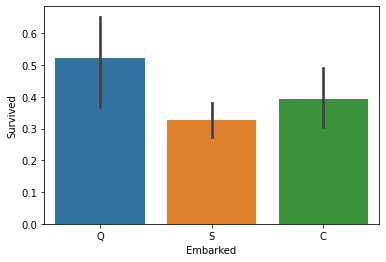

In [55]:
#Precentage of the passengers grouped by port of Embarkation
sns.barplot(x='Embarked',y='Survived',data=df)
df.groupby('Embarked',as_index=False).Survived.mean()

C:\Users\NAIB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    253
0    165
Name: TravelAlone, dtype: int64

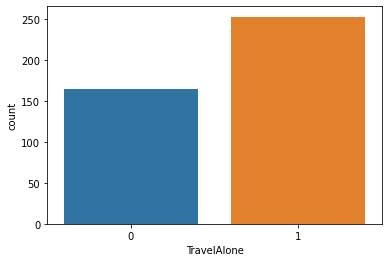

In [56]:
#Count of passengers based on TravelAlone
sns.countplot('TravelAlone',data=df)
df['TravelAlone'].value_counts()

,TravelAlone,Survived
0,0,0.509091
1,1,0.268775


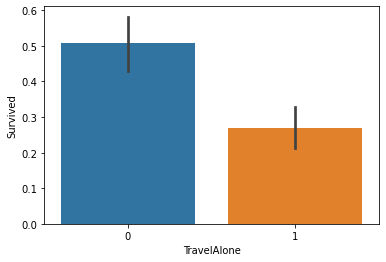

In [57]:
##Precentage of the passengers grouped by TravelAlone
sns.barplot(x='TravelAlone',y='Survived',data=df)
df.groupby('TravelAlone',as_index=False).Survived.mean()

The Median age of passengers is: 30


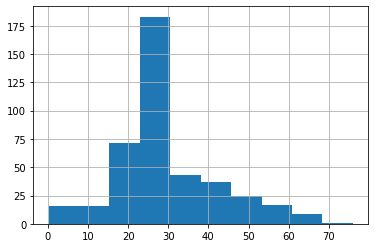

In [58]:
#Age Distribution
df.Age.hist()
print("The Median age of passengers is:", int(df.Age.median()))

In [59]:
df.corr()

,Survived,Pclass,Age,Fare,TravelAlone
Survived,1.000000,-0.108615,-0.000011,0.192036,-0.244187
Pclass,-0.108615,1.000000,-0.440782,-0.577313,0.173555
Age,-0.000011,-0.440782,1.000000,0.324568,-0.021604
Fare,0.192036,-0.577313,0.324568,1.000000,-0.282955
TravelAlone,-0.244187,0.173555,-0.021604,-0.282955,1.000000


In [60]:
#Import label encoder
from sklearn import preprocessing
  
#label_encoder object knows how to understand word labels
label_encoder = preprocessing.LabelEncoder()
  
#Encode labels in column Sex and Embarked
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Embarked']=label_encoder.fit_transform(df['Embarked'])

In [61]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,1,34.5,7.8292,1,1
1,1,3,0,47.0,7.0000,2,0
2,0,2,1,62.0,9.6875,1,1
3,0,3,1,27.0,8.6625,2,1
4,1,3,0,22.0,12.2875,2,0


In [62]:
X = df.drop('Survived', 1)
y = df.Survived

C:\Users\NAIB\AppData\Local\Temp/ipykernel_22296/2373418412.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('Survived', 1)


In [63]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [64]:
#Fitting the Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [65]:
#Prediction of test set
y_pred = lr_model.predict(X_test)
#Predicted values
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [66]:
#Actual value and the predicted value
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
a.head()

,Actual value,Predicted value
146,0,0
223,0,0
193,0,0
305,1,1
188,1,1


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        33

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



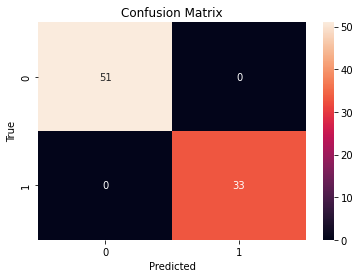

In [67]:
#Confusion matrix and classification report
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))